In [1]:
from zipfile import ZipFile

In [2]:
# with ZipFile('PlantDoc/PlantDoc.v1-resize-416x416.tensorflow.zip', 'r') as data:
#     data.extractall('PlantDoc')

In [1]:

import pandas as pd
import numpy as np
import PIL
# import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [2]:
train_csv = pd.read_csv('PlantDoc/train/annotations.csv', sep = ',')
test_csv = pd.read_csv('PlantDoc/test/annotations.csv', sep = ',')

In [3]:
# Excluding Classes with min number of example
excluded_classes = ['Tomato two spotted spider mites leaf', 'Potato leaf', 'Soybean leaf']

train_csv = train_csv[~train_csv['class'].isin(excluded_classes)]
train_csv

,filename,width,height,class,xmin,ymin,xmax,ymax,Unnamed: 8
0,Faske%20Southern%20rust%20of%20corn_jpg.rf.016...,416,416.0,Corn rust leaf,235,2.0,415.0,344.0,NaN
1,Slide1_preview_jpg.rf.00f57cfc188631c10e10e2b9...,416,416.0,Corn leaf blight,3,3.0,415.0,312.0,NaN
2,2017-08-27%2B-%2BLate%2BBlight%2Bon%2BGypsy%2B...,416,416.0,Tomato leaf late blight,105,42.0,267.0,354.0,NaN
3,Apple-Scab-image-02_jpg.rf.00cbc9a108dbdaadf42...,416,416.0,Apple Scab Leaf,151,35.0,256.0,390.0,NaN
4,Apple-Scab-image-02_jpg.rf.00cbc9a108dbdaadf42...,416,416.0,Apple Scab Leaf,86,278.0,194.0,385.0,NaN
...,...,...,...,...,...,...,...,...,...
8358,role-of-whitefly-in-plant-virus-transmission-b...,416,416.0,Tomato leaf yellow virus,293,153.0,338.0,188.0,NaN
8359,role-of-whitefly-in-plant-virus-transmission-b...,416,416.0,Tomato leaf yellow virus,321,239.0,359.0,290.0,NaN
8360,role-of-whitefly-in-plant-virus-transmission-b...,416,416.0,Tomato leaf yellow virus,241,282.0,282.0,327.0,NaN
8361,role-of-whitefly-in-plant-virus-transmission-b...,416,416.0,Tomato leaf yellow virus,255,216.0,293.0,257.0,NaN


In [4]:
test_csv

,filename,width,height,class,xmin,ymin,xmax,ymax
0,6134794031202304_jpeg_jpg.rf.021531229ad8d669e...,416.0,416.0,Tomato Septoria leaf spot,42.0,106.0,257.0,347.0
1,peach-leaf-16690421_jpg.rf.030bd0c31f731f86e54...,416.0,416.0,Peach leaf,22.0,85.0,407.0,266.0
2,glyphosate_jpg.rf.01dea2d24a1e3591855a68e077bb...,416.0,416.0,Tomato leaf yellow virus,283.0,107.0,357.0,176.0
3,glyphosate_jpg.rf.01dea2d24a1e3591855a68e077bb...,416.0,416.0,Tomato leaf yellow virus,363.0,105.0,411.0,198.0
4,glyphosate_jpg.rf.01dea2d24a1e3591855a68e077bb...,416.0,416.0,Tomato leaf yellow virus,176.0,88.0,222.0,148.0
...,...,...,...,...,...,...,...,...
450,17fc47_jpg.rf.fe1c3b512f4182d08f00ac2c612ddb1c...,416.0,416.0,Tomato leaf yellow virus,94.0,152.0,185.0,246.0
451,17fc47_jpg.rf.fe1c3b512f4182d08f00ac2c612ddb1c...,416.0,416.0,Tomato leaf yellow virus,148.0,122.0,246.0,222.0
452,17fc47_jpg.rf.fe1c3b512f4182d08f00ac2c612ddb1c...,416.0,416.0,Tomato leaf yellow virus,226.0,108.0,300.0,217.0
453,636368370164094909-late-blight-15-_jpg.rf.febe...,416.0,416.0,Tomato leaf late blight,96.0,84.0,391.0,310.0


In [5]:
dieases = train_csv['class'].nunique()
print(f'Number of Classes : {dieases}')

Number of Classes : 28


In [6]:
class_count = train_csv['class'].value_counts()
pd.DataFrame({'Class':class_count.index, 'Count':class_count.values})

,Class,Count
0,Blueberry leaf,812
1,Tomato leaf yellow virus,740
2,Peach leaf,579
3,Raspberry leaf,539
4,Strawberry leaf,443
5,Tomato Septoria leaf spot,402
6,Tomato leaf,373
7,Corn leaf blight,356
8,Bell_pepper leaf,312
9,Potato leaf early blight,301


In [7]:
# Converting col into string
train_csv['filename'] = train_csv['filename'].astype(str)
train_csv['class'] = train_csv['class'].astype(str)
test_csv['filename'] = test_csv['filename'].astype(str)
test_csv['class'] = test_csv['class'].astype(str)

In [8]:
train_df, val_df = train_test_split(train_csv, test_size=0.2, random_state=42)

In [9]:
train_img = 'PlantDoc/train'
test_img = 'PlantDoc/test'

In [10]:
train_gen = ImageDataGenerator(rescale=1./255,
            rotation_range=20,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.4,
            brightness_range=(.5, 1.5),
            horizontal_flip=True,
            vertical_flip=True,
            fill_mode='nearest')
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale = 1./255)

In [11]:
train_data = train_gen.flow_from_dataframe(dataframe=train_df, directory=train_img,x_col= 'filename',
                                           y_col= 'class', seed = 42, 
                                           class_mode = 'categorical', shuffle = True, 
                                           target_size = (416,416), batch_size = 128, )
val_data =  val_gen.flow_from_dataframe(dataframe=val_df,
                                        directory=train_img,
                                        x_col='filename',
                                        y_col='class',
                                        target_size=(416, 416),
                                        batch_size=128,
                                        class_mode='categorical',
                                        shuffle=False,
                                            )


Found 6645 validated image filenames belonging to 27 classes.
Found 1657 validated image filenames belonging to 27 classes.


/opt/conda/lib/python3.9/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 23 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 10 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [12]:
img, label =train_data[0]
# print(label)

In [13]:
labels_mapping =train_data.class_indices
pd.DataFrame({'Class':labels_mapping.keys(),'labels':labels_mapping.values()})

,Class,labels
0,Apple Scab Leaf,0
1,Apple leaf,1
2,Apple rust leaf,2
3,Bell_pepper leaf,3
4,Bell_pepper leaf spot,4
5,Blueberry leaf,5
6,Cherry leaf,6
7,Corn Gray leaf spot,7
8,Corn leaf blight,8
9,Corn rust leaf,9


In [14]:
num_classes = train_data.classes
train_steps = np.ceil(train_data.samples / train_data.batch_size)
val_steps = np.ceil(val_data.samples / val_data.batch_size)

In [15]:
from matplotlib import pyplot as plt

def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, dpi=150)
  ax1.plot(history.history['loss'], label='training')
  ax1.plot(history.history['val_loss'], label='validation')
  ax1.set_ylabel('Cross-Entropy Loss')
  ax1.set_yscale('log')
  if history.history.__contains__('lr'):
    ax1b = ax1.twinx()
    ax1b.plot(history.history['lr'], 'g-', linewidth=1)
    ax1b.set_yscale('log')
    ax1b.set_ylabel('Learning Rate', color='g')

  ax2.plot(history.history['accuracy'], label='training')
  ax2.plot(history.history['val_accuracy'], label='validation')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.legend()
  plt.show()

In [16]:
from tensorflow.keras import layers, Model
from tensorflow.keras.applications.vgg16 import VGG16
tf.compat.v1.disable_eager_execution()
def build_model(summary=True):

    pre_trained_model = VGG16(
        input_shape=(416,416,3),
        weights='imagenet',
        include_top=False
    )
    pre_trained_model.trainable = False
    x = layers.GlobalMaxPool2D()(pre_trained_model.output)
    x = layers.Dense(512 , activation='relu')(x)
    x = layers.Dropout(.2)(x)
    x = layers.Dense(512 , activation='relu')(x)
    x = layers.Dropout(.2)(x)
    out_put = layers.Dense(27 , activation='softmax')(x)
    # Define the model
    model = Model(pre_trained_model.input, out_put, name = 'vgg_tranfer_learning_model')
  

    if summary:
        print(model.summary())

    return model
model= build_model()

2023-06-19 14:05:49.566385: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 14:05:50.044701: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11441 MB memory:  -> device: 0, name: NVIDIA TITAN Xp, pci bus id: 0000:09:00.0, compute capability: 6.1


Model: "vgg_tranfer_learning_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 416, 416, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 416, 416, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 416, 416, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 208, 208, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 208, 208, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 208, 208, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 104,

In [17]:
from tensorflow.keras.optimizers import Adam
INITIAL_LEARNING_RATE = 1e-3
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(INITIAL_LEARNING_RATE) , metrics=['accuracy'])

In [18]:
def lr_step_decay(epoch, lr, drop=.9, drop_epochs=10):
    if epoch < 10:
        return INITIAL_LEARNING_RATE
    else:
        return INITIAL_LEARNING_RATE * np.power(drop, np.floor(epoch/drop_epochs))

LRDecayCallback = tf.keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=1)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True, verbose = 1)
StopCallback = [LRDecayCallback, earlystopping]

In [19]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [20]:
from PIL import Image
print(Image.__file__)

/opt/conda/lib/python3.9/site-packages/PIL/Image.py


In [21]:
import Image
print(Image.__file__)

/opt/conda/lib/python3.9/site-packages/PIL/Image.py



Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100


2023-06-19 14:06:09.906651: W tensorflow/core/kernels/gpu_utils.cc:50] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.
2023-06-19 14:06:10.325020: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8401
2023-06-19 14:06:10.781196: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-06-19 14:06:10.781988: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-06-19 14:06:10.782051: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-06-19 14:06:10.782835: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-06-19 14:06:10.782964:

52/52 - 387s - loss: 2.9218 - accuracy: 0.1887 - val_loss: 2.3615 - val_accuracy: 0.3102 - lr: 0.0010 - 387s/epoch - 7s/step

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/100
52/52 - 344s - loss: 2.3606 - accuracy: 0.3217 - val_loss: 1.9289 - val_accuracy: 0.4375 - lr: 0.0010 - 344s/epoch - 7s/step

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/100
52/52 - 358s - loss: 2.1206 - accuracy: 0.3843 - val_loss: 1.7548 - val_accuracy: 0.4756 - lr: 0.0010 - 358s/epoch - 7s/step

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/100
52/52 - 355s - loss: 1.9638 - accuracy: 0.4220 - val_loss: 1.6776 - val_accuracy: 0.4864 - lr: 0.0010 - 355s/epoch - 7s/step

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/100
52/52 - 356s - loss: 1.8812 - accuracy: 0.4460 - val_loss: 1.5705 - val_accuracy: 0.5154 - lr: 0.0010 - 356s/epoch - 7s/step

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6

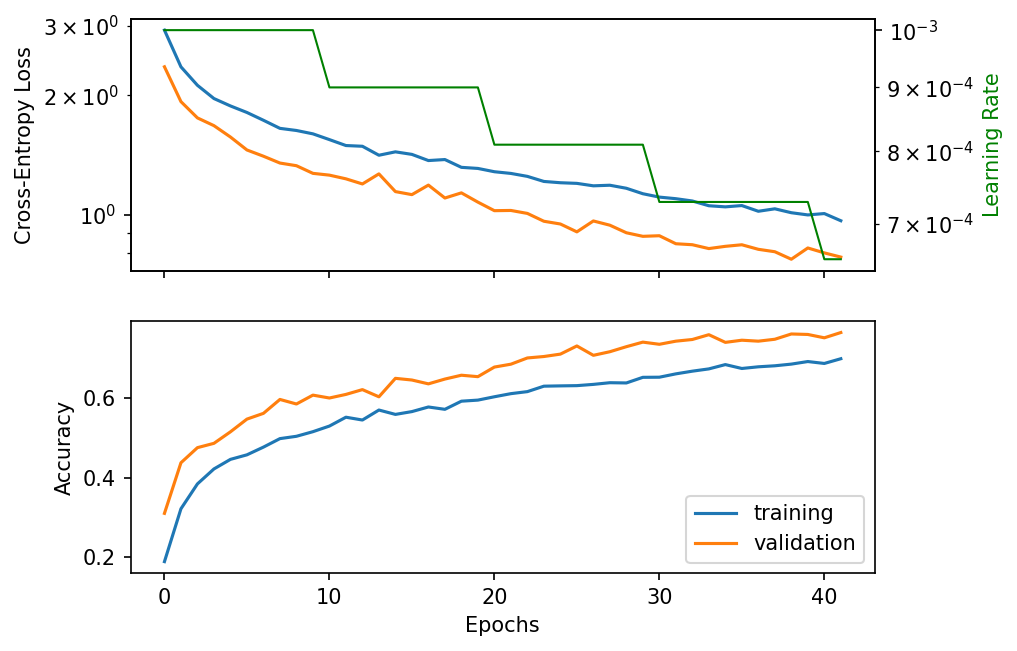

In [22]:
from PIL import Image
# from sklearn.preprocessing import LabelEncoder


history = model.fit(
    train_data,
    steps_per_epoch=train_steps,
    epochs=100,
    validation_data=val_data,
    validation_steps=val_steps,
    callbacks = StopCallback,
    verbose=2
)

plot_history( history )